# Astronomy-Specific Packages
## PyIU Advanced Python Workshop

Author: Lexi Gault

Last modified: 4/17/2025

Python has a number of Astronomy specific packages that make handling astronomical data much easier! You can handle fits files, spectra, and search astronomy databases with these packages. The main ones that people often use are

1. Astropy (documentation here: https://docs.astropy.org/en/stable/)
2. Specutils (documentation here: https://specutils.readthedocs.io/en/stable/)
3. Astroquery (documentation here: https://astroquery.readthedocs.io/en/latest/)

In [ ]:
### Let's import some general necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Astropy Examples

Astropy has an extremely long list of functions and uses. Explore the documentation for more information. Below I give examples of using astropy to plot fits images.

The first example is using data stored in astropy to plot an example fits image.


In [ ]:
## Importing astropy tools
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

In [ ]:
## This is an example using Astropy tutorial data
image_file = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits') #pulling fits file from Astropy
fits.info(image_file) #Prints info about the data file you imported above
image_data = fits.getdata(image_file, ext=0) #Gets the data out of the fits file and stores it here.
#Fits file will typically have a header with information about the data and then the data itself, so you have to pull the data to work with it.
print(image_data.shape) #prints the shape of the data, essentially how many pixels are in each axis.

Filename: /root/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   
(893, 891)


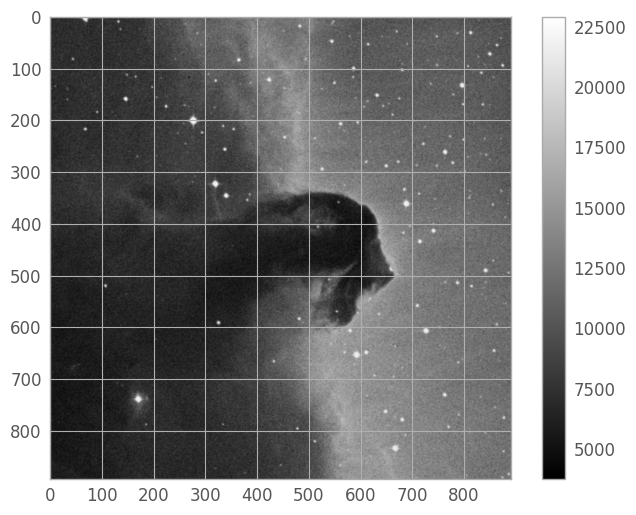

In [ ]:
plt.style.use(astropy_mpl_style) #Astropy style sometimes used to plot fits image
plt.figure()
plt.imshow(image_data, cmap='gray') #plotting the data, notice that the x and y axes are pixels
plt.colorbar() #plotting the color bar for the grayscale

Now what if we have our own fits file we want to plot?

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Changed DATE-OBS from '2009-04-20        ' to '2009-04-20T00:00:00.0''. [astropy.wcs.wcs]
Changed DATE-OBS from '2009-04-20        ' to '2009-04-20T00:00:00.0''.


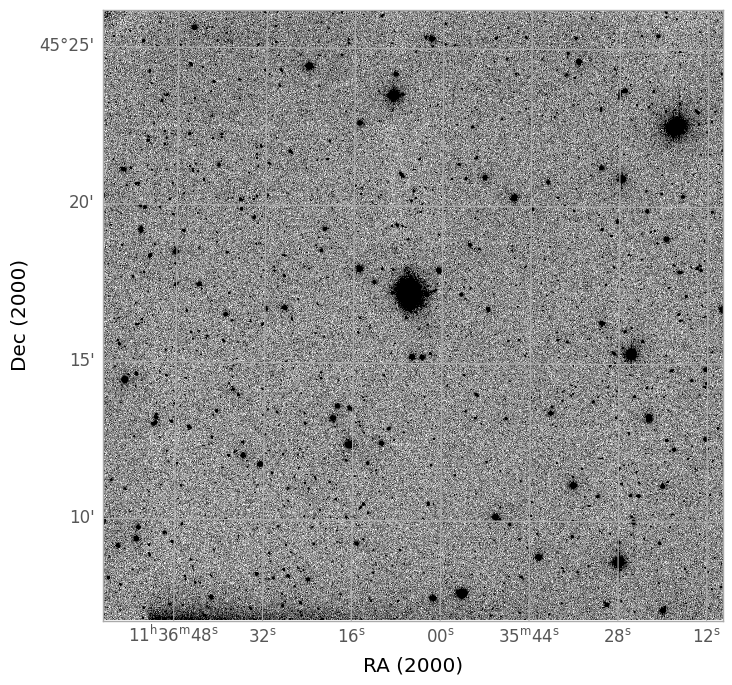

In [ ]:
from astropy.wcs import WCS
from astropy import units as u

ngc3741 = '/content/ngc3741r.fits'
hdu = fits.open(ngc3741)[0] #Open the fits file that we defined above.
wcs = WCS(hdu.header) #Tells python the RA and Dec coordinates associated with the pixel values in the fits file

fig=plt.figure(figsize=(8,8))

ax = plt.subplot(projection=wcs) #projecting the data onto the coordinate system from the file header.
ax.set_facecolor('white')
ax.set_xlabel('RA (2000)')
ax.set_ylabel('Dec (2000)')
ra_ax = ax.coords['ra']
dec_ax = ax.coords['dec']

ax.imshow(hdu.data,origin='lower',cmap=plt.get_cmap('binary'),vmin =-20,vmax=25,transform=ax.get_transform(wcs))
#vmin and vmax set your scale for the color map.

ra_ax.set_ticks(spacing=4 * u.arcmin)

## Specutils

Specutils is usefull in handling spectra. You can use it to produce your own example spectrum or to fit existing data. See the documentation for more detailed applications.

In [ ]:
!pip install specutils
from astropy.modeling import models

from specutils.spectra import Spectrum1D
from specutils.fitting import fit_lines

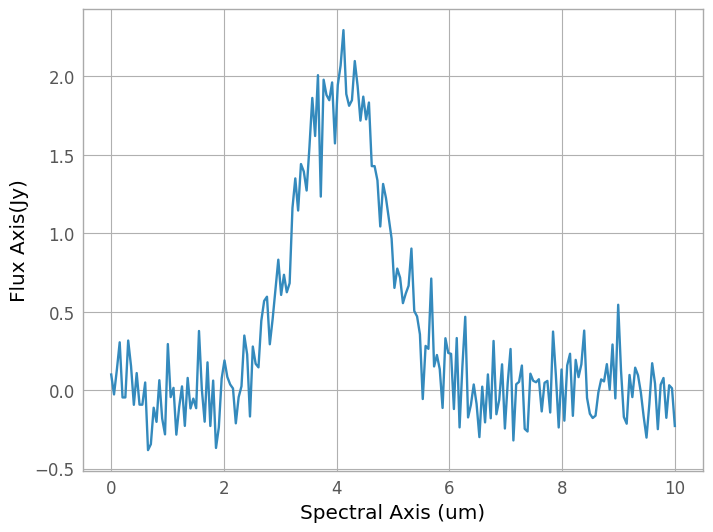

In [ ]:
# Creating a random spectrum!
np.random.seed(42) #start with a seed, if ran multiple times will generate same random numbers
x = np.linspace(0, 10, 200)
y = 2 * np.exp(-0.5 * (x- 4.1)**2 / 0.75**2) + np.random.normal(0., 0.2, x.shape) #make our shape a gaussian and add some random noise
spectrum = Spectrum1D(flux=y*u.Jy, spectral_axis=x*u.um) #define the spectrum with Spectrum1D

plt.plot(spectrum.spectral_axis, spectrum.flux) #Can call the spectral axis and flux from the spectrum we defined above
plt.xlabel('Spectral Axis ({})'.format(spectrum.spectral_axis.unit))
plt.ylabel('Flux Axis({})'.format(spectrum.flux.unit))
plt.grid(True)

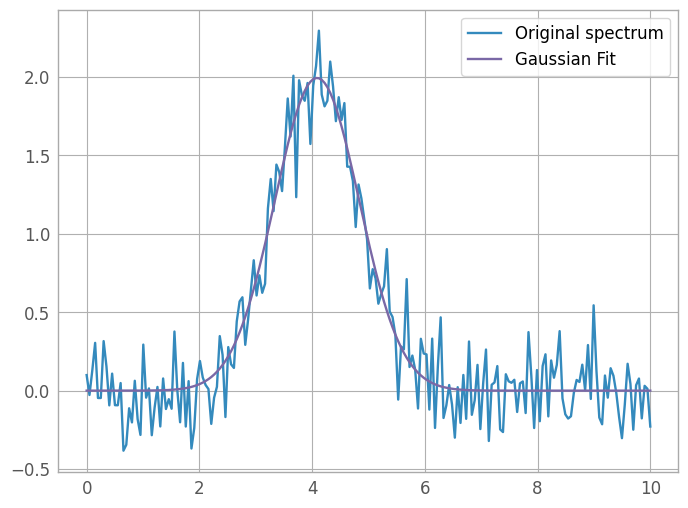

In [ ]:
#Fitting a gaussian to the spectrum!
g_init = models.Gaussian1D(amplitude=2.*u.Jy, mean=4.1*u.um, stddev=0.75*u.um) #Give the model initial guesses
g_fit = fit_lines(spectrum, g_init) #fit the model to the data
y_fit = g_fit(x*u.um) #output the expected y values from the fit

plt.plot(x, y, label="Original spectrum")
plt.plot(x, y_fit, label="Gaussian Fit")
plt.grid(True)
plt.legend()

## Astroquery

Astroquery is useful if you need to compare to data from other databases/surveys. You can search a variety of a catalogs with astroquery and return the data you're interesting in.

In [ ]:
!pip install astroquery
from astroquery.sdss import SDSS
from astropy import coordinates as coords

In [ ]:
pos = coords.SkyCoord('11h36m08.59s +45d16m03.734s', frame='icrs') #Define the coordinates you want to search
result = SDSS.query_region(pos, radius='500 arcsec', spectro=True) #Query the region you defined
print(result)

       ra              dec        ...      specobjid       run2d 
---------------- ---------------- ... ------------------- -------
174.025426172187 45.2856455065283 ... 1539193460186179584      26
174.031492630797 45.3492730882281 ... 1538140677467039744      26
173.994425904483 45.2532421444699 ... 8329464249437888512 v5_10_0
 173.94494021439 45.2911704565791 ... 7482970031845777408 v5_10_0
174.023493273399 45.2944644648603 ... 7482969756967870464 v5_10_0
174.058666366147 45.2298042470667 ... 8329464524315795456 v5_10_0
174.063773369137 45.1538230240053 ... 1538141776978667520      26
174.163434864588 45.2748564550461 ... 1538153871606573056      26
 174.10718453799 45.1406542899705 ... 8329463974559981568 v5_10_0
174.166640038681 45.2306249691742 ... 7481738853851570176 v5_10_0
174.020724101272 45.2845071733402 ... 8329464799193702400 v5_10_0
174.038060494421 45.2869911023383 ... 3619929635384565760     104
174.048702827205 45.3778494658942 ... 8329466448461144064 v5_10_0
173.918244

/usr/local/lib/python3.10/dist-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [ ]:
info = []
for i in range(len(result)):
    pos = coords.SkyCoord(result[i][0],result[i][1], unit='deg')
    mags = SDSS.query_crossid(pos, photoobj_fields=['modelMag_g', 'modelMag_r']) #We can get more detailed information about the coordinates we found above here.
    info.append(mags)
print(info)

[<Table length=1>
obj_id        objID        modelMag_g modelMag_r       obj_id1        type 
bytes5        int64         float64    float64          int64        bytes6
------ ------------------- ---------- ---------- ------------------- ------
 obj_0 1237661852002942989   14.21787   14.05649 1237661852002942989 GALAXY, <Table length=1>
obj_id        objID        modelMag_g modelMag_r       obj_id1        type 
bytes5        int64         float64    float64          int64        bytes6
------ ------------------- ---------- ---------- ------------------- ------
 obj_0 1237661874010849341   18.42652    17.5627 1237661874010849341 GALAXY, <Table length=1>
obj_id        objID        modelMag_g modelMag_r       obj_id1        type 
bytes5        int64         float64    float64          int64        bytes4
------ ------------------- ---------- ---------- ------------------- ------
 obj_0 1237661852002943243   20.48222   20.50872 1237661852002943243   STAR, <Table length=1>
obj_id        ob